In [1]:
import pandas as pd
from pandas import DataFrame
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import seaborn as sns
#import pandas_profiling
%matplotlib inline
from matplotlib import rc
import scipy.stats
from scipy.stats.mstats import winsorize
rem_life = pd.read_csv("Life Expectancy Data.csv") #reading the file
rem_life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [2]:
rem_life

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [3]:
rem_life.describe() #for looking at diff. metrics at data

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
rem_life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
#renaming columns as there is some inconsistancy
rem_life.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [6]:
rem_life.corr()

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life_expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult_mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
Infant_deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
Percentage_expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
HepatitisB,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
Under_five_deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


<AxesSubplot:>

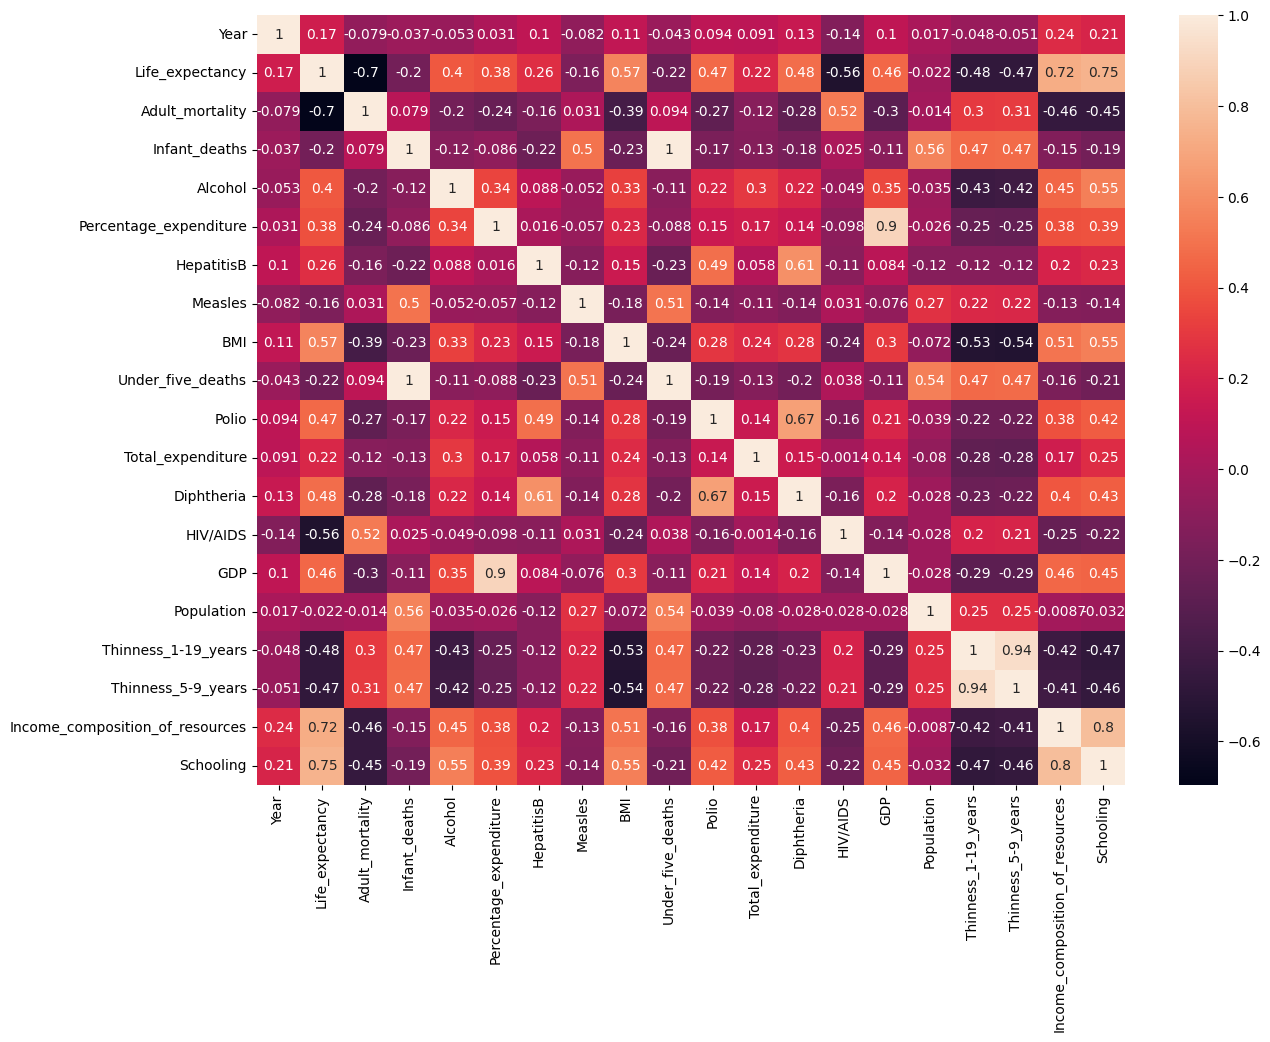

In [7]:
plt.figure(figsize = (14, 10))
corr = rem_life.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
           annot=True)

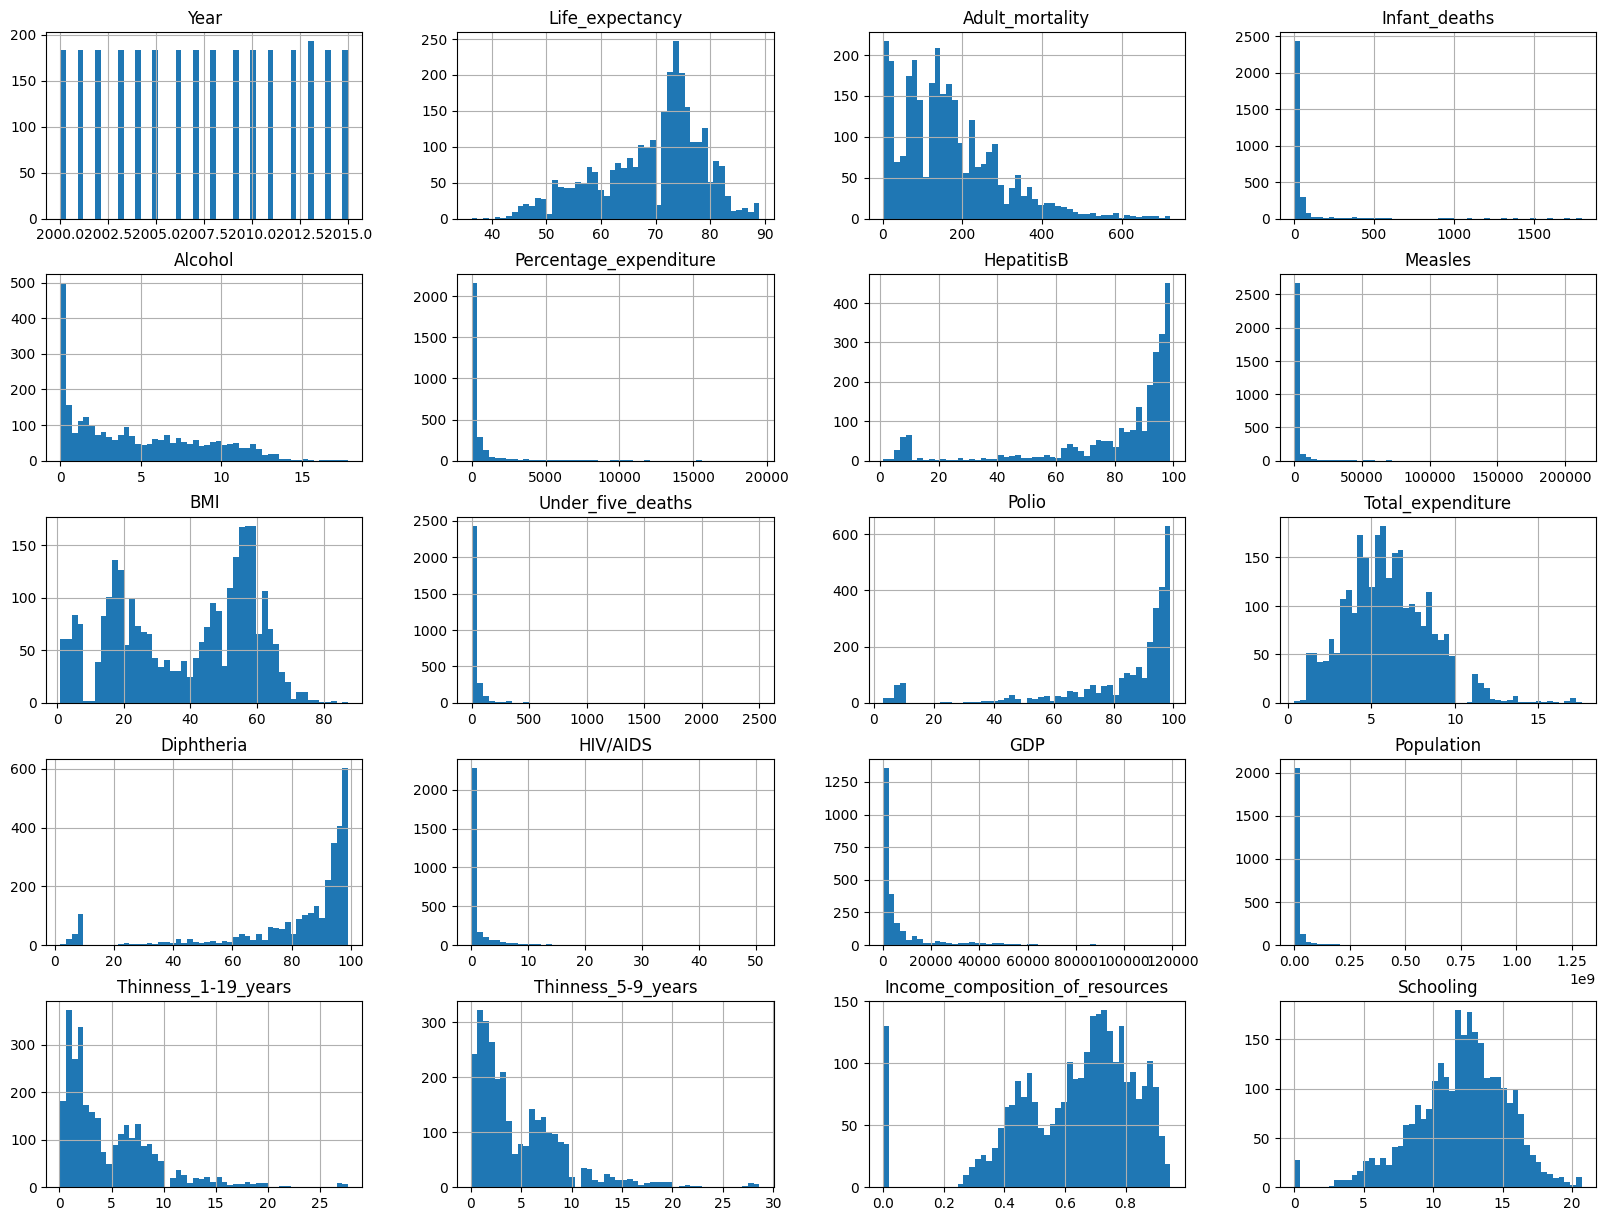

In [8]:
import matplotlib
rem_life.hist(bins=50, figsize=(20,15))
matplotlib.pyplot.show()

In [9]:
rem_life.Country.nunique()

193

In [10]:
rem_life

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<AxesSubplot:xlabel='Life_expectancy', ylabel='Income_composition_of_resources'>

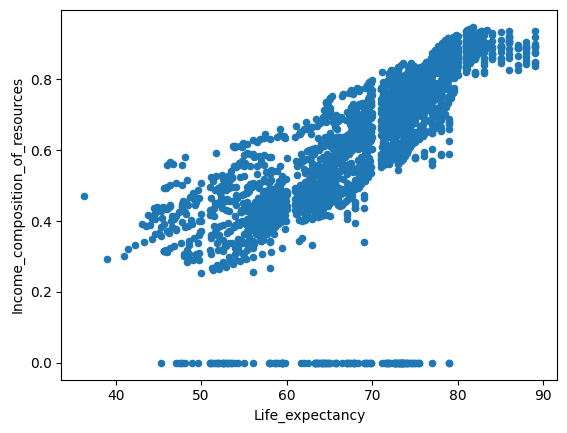

In [11]:
#plt.scatter(rem_life['HIV/AIDS'], rem_life['Life_expectancy'])
rem_life.plot(kind="scatter", x="Life_expectancy", y="Income_composition_of_resources")

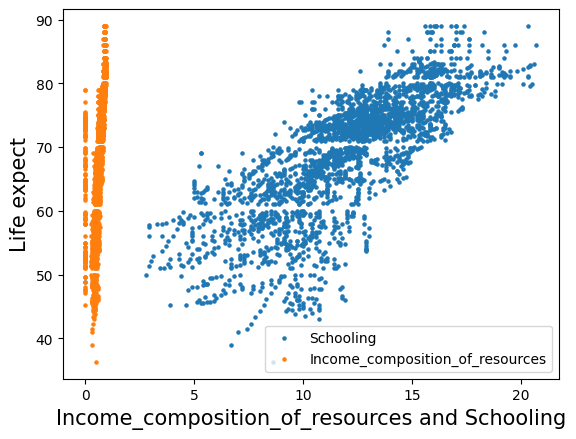

In [12]:
#Since data is not normalized, hence scatter is not plotted good
plt.scatter(y=rem_life["Life_expectancy"], x=rem_life["Schooling"], s=5, label = 'Schooling')
plt.scatter(y=rem_life["Life_expectancy"], x=rem_life["Income_composition_of_resources"], s=5, label = 'Income_composition_of_resources')
plt.legend(fontsize=15)
plt.xlabel('Income_composition_of_resources and Schooling', fontsize=15)
plt.ylabel('Life expect', fontsize=15)
plt.legend()
plt.show()

In [13]:
life_null=rem_life['Life_expectancy'].isnull()

In [14]:
rem_life

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [15]:
#x = rem_life.iloc[:,rem_life.columns != rem_life['Life_expectancy']].values
x=rem_life.drop(['Country','Status'], axis=1)

In [16]:
x

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2003,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2002,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2001,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [17]:
#normalizing the data
x = (x - x.mean())/x.std()
x.head()

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,1.621486,-0.443615,0.790103,0.268778,-1.133365,-0.335513,-0.635838,-0.110366,-0.958951,0.255316,-3.267459,0.889322,-0.730453,-0.32339,-0.483449,0.343917,2.796324,2.756711,-0.704355,-0.563512
1,1.404747,-0.979112,0.854468,0.285738,-1.133365,-0.334384,-0.755503,-0.168095,-0.983896,0.274014,-1.047897,0.897327,-0.856945,-0.32339,-0.481456,-0.203661,2.864194,2.801068,-0.718580,-0.593284
2,1.188008,-0.979112,0.830331,0.302697,-1.133365,-0.334537,-0.675726,-0.173502,-1.008841,0.292712,-0.877162,0.877314,-0.772617,-0.32339,-0.480121,0.311058,2.909441,2.845424,-0.747029,-0.623055
3,0.971269,-1.021112,0.862513,0.328137,-1.133365,-0.332040,-0.556061,0.032040,-1.033786,0.317642,-0.663742,1.033419,-0.646125,-0.32339,-0.477443,-0.148436,2.954688,2.911960,-0.780219,-0.652827
4,0.754530,-1.052611,0.886650,0.345097,-1.133365,-0.367800,-0.516173,0.051748,-1.053742,0.342573,-0.621059,0.773244,-0.603961,-0.32339,-0.519939,-0.160210,3.022558,2.956317,-0.822893,-0.742141


In [18]:
#extracting the target column from remaining dataframe
y = x.iloc[:,1:2]

In [19]:
y

,Life_expectancy
0,-0.443615
1,-0.979112
2,-0.979112
3,-1.021112
4,-1.052611
...,...
2933,-2.617102
2934,-2.596102
2935,-2.564602
2936,-2.512103


In [20]:
x=x.drop(['Life_expectancy'], axis=1)

In [21]:
x

,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,1.621486,0.790103,0.268778,-1.133365,-0.335513,-0.635838,-0.110366,-0.958951,0.255316,-3.267459,0.889322,-0.730453,-0.323390,-0.483449,0.343917,2.796324,2.756711,-0.704355,-0.563512
1,1.404747,0.854468,0.285738,-1.133365,-0.334384,-0.755503,-0.168095,-0.983896,0.274014,-1.047897,0.897327,-0.856945,-0.323390,-0.481456,-0.203661,2.864194,2.801068,-0.718580,-0.593284
2,1.188008,0.830331,0.302697,-1.133365,-0.334537,-0.675726,-0.173502,-1.008841,0.292712,-0.877162,0.877314,-0.772617,-0.323390,-0.480121,0.311058,2.909441,2.845424,-0.747029,-0.623055
3,0.971269,0.862513,0.328137,-1.133365,-0.332040,-0.556061,0.032040,-1.033786,0.317642,-0.663742,1.033419,-0.646125,-0.323390,-0.477443,-0.148436,2.954688,2.911960,-0.780219,-0.652827
4,0.754530,0.886650,0.345097,-1.133365,-0.367800,-0.516173,0.051748,-1.053742,0.342573,-0.621059,0.773244,-0.603961,-0.323390,-0.519939,-0.160210,3.022558,2.956317,-0.822893,-0.742141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762644,4.491063,-0.028017,-0.059930,-0.371370,-0.516173,-0.208296,-0.559830,-0.000223,-0.663742,0.477045,-0.730453,6.273976,-0.492551,0.000396,1.031696,1.004613,-1.045744,-0.831456
2934,-0.979384,4.426698,-0.036497,-0.133960,-0.371370,-2.949358,-0.123970,-0.579786,-0.006455,-3.224775,0.232881,-0.603961,6.884478,-0.492623,-0.001958,1.122189,1.115506,-0.993587,-0.742141
2935,-1.196123,-0.738554,-0.044977,-0.042656,-0.371370,-0.316731,-0.184490,-0.599742,-0.012688,-0.407639,0.236883,-0.477469,7.494981,-0.520373,-0.206973,-0.823426,-0.791841,-0.950914,-0.593284
2936,-1.412862,4.193377,-0.044977,-0.711394,-0.371370,-0.197067,-0.164869,-0.619698,-0.018921,-0.279587,0.088784,-0.308813,7.947934,-0.485949,-0.006346,-0.732932,-0.703127,-0.950914,-0.652827


In [22]:
#y=rem_life['Life_expectancy']
c=x['Schooling']
d=x['Income_composition_of_resources']

In [23]:
x.shape

(2938, 19)

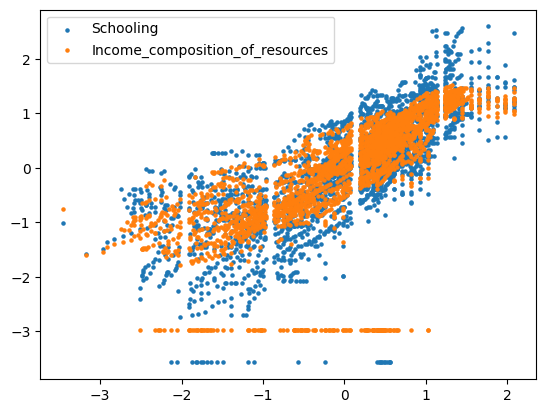

In [24]:
#after normalization plot is good
plt.scatter(y, c, s=5, label = 'Schooling')
plt.scatter(y, d, s=5, label = 'Income_composition_of_resources')
plt.legend(fontsize=15)
plt.legend()
plt.show()

In [25]:
#setting the matrixes
X = x.iloc[:,0:19]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)
#y = y.iloc[:,:].values#.values converts it from pandas.core.frame.DataFrame to numpy.ndarray
theta = np.zeros([1,20])

In [26]:
theta = np.zeros([1,20])

In [27]:
X

array([[ 1.        ,  1.62148628,  0.79010306, ...,  2.75671063,
        -0.70435543, -0.56351236],
       [ 1.        ,  1.40474712,  0.85446758, ...,  2.80106753,
        -0.71857994, -0.59328384],
       [ 1.        ,  1.18800796,  0.83033088, ...,  2.84542442,
        -0.74702897, -0.62305532],
       ...,
       [ 1.        , -1.19612277, -0.73855429, ..., -0.7918408 ,
        -0.95091363, -0.59328384],
       [ 1.        , -1.41286193,  4.19337705, ..., -0.70312702,
        -0.95091363, -0.65282679],
       [ 1.        , -1.62960109,  4.02442019, ...,  1.4038254 ,
        -0.9177231 , -0.65282679]])

In [28]:
theta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

In [29]:
rem_life

,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [30]:
#Creating the test set
X_data=pd.DataFrame(X)
num_of_rows = int(len(X_data) * 0.8)
values = X_data.values
#np.random_shuffle(values) #shuffles data to make it random
Xtrain = values[:num_of_rows] #indexes rows for training data
Xtest = values[num_of_rows:] #indexes rows for test data

In [31]:
len(Xtrain)

2350

In [32]:
#splitting the traget as per X
Ytrain=y.iloc[0:2350].values
Ytest=y.iloc[2350:len(y)].values

In [33]:
Ytrain

array([[-0.44361513],
       [-0.97911187],
       [-0.97911187],
       ...,
       [ 1.65637209],
       [ 1.34137401],
       [ 1.11037541]])

In [34]:
#len(Xtrain), len(Xtest), len(Ytrain), len(Ytest) 
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape, theta.shape

((2350, 20), (588, 20), (2350, 1), (588, 1), (1, 20))

In [35]:
theta

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.]])

# Multivariate Gradient Descent :

In [36]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.nansum(tobesummed)/(2 * len(X))
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.nansum(X * (X @ theta.T - y), axis=0)
        #print(theta)
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [37]:
alpha = 0.01
iters = 500

In [38]:
theta,cost = gradientDescent(Xtrain,Ytrain,theta,iters,alpha)
print(theta)

finalCost = computeCost(Xtrain,Ytrain,theta)
print(finalCost)

[[ 0.01166756 -0.02937126 -0.26715839  0.00076163 -0.00629317  0.05503241
  -0.00591464  0.01333161  0.09012004 -0.02710175  0.02308195  0.03134258
   0.0635974  -0.25094008  0.05453969  0.01422851 -0.02167172 -0.01702783
   0.21874918  0.22588042]]
0.04290007667511185


Text(0.5, 1.0, 'Error vs. Training')

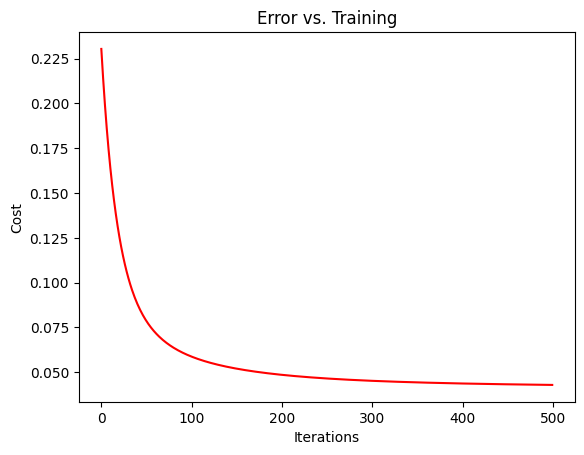

In [39]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), cost, 'r')  
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training')  

In [40]:
#preductinf the value of Y
def predict(m, w, b):
    return m.dot(w) + b
y_pred = predict(Xtest, np.transpose(theta), finalCost)

In [41]:
#finding the rows which contains 'nan' values
idx=np.argwhere(np.isnan(y_pred).all(axis=1))

In [42]:
#removing those whihc contains 'nan'
y_predUp = np.delete(y_pred, idx, 0)

In [43]:
y_testUp = np.delete(Ytest, idx, 0)

In [44]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    
    r2 = 1 - (rss / tss)
    return r2
r2score(y_predUp, y_testUp)

0.8333080911839819

In [45]:
def MAE(y_pred,y):
    res=np.sum(abs(y_pred-y))/len(y)
    return res
MAE(y_predUp, y_testUp)

0.2901235658481076

In [46]:
MSE = np.square(np.subtract(y_testUp,y_predUp)).mean()

In [47]:
MSE

0.14944245648643675

# Univariate Gradient Descent : 

In [48]:
x

,Year,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,1.621486,0.790103,0.268778,-1.133365,-0.335513,-0.635838,-0.110366,-0.958951,0.255316,-3.267459,0.889322,-0.730453,-0.323390,-0.483449,0.343917,2.796324,2.756711,-0.704355,-0.563512
1,1.404747,0.854468,0.285738,-1.133365,-0.334384,-0.755503,-0.168095,-0.983896,0.274014,-1.047897,0.897327,-0.856945,-0.323390,-0.481456,-0.203661,2.864194,2.801068,-0.718580,-0.593284
2,1.188008,0.830331,0.302697,-1.133365,-0.334537,-0.675726,-0.173502,-1.008841,0.292712,-0.877162,0.877314,-0.772617,-0.323390,-0.480121,0.311058,2.909441,2.845424,-0.747029,-0.623055
3,0.971269,0.862513,0.328137,-1.133365,-0.332040,-0.556061,0.032040,-1.033786,0.317642,-0.663742,1.033419,-0.646125,-0.323390,-0.477443,-0.148436,2.954688,2.911960,-0.780219,-0.652827
4,0.754530,0.886650,0.345097,-1.133365,-0.367800,-0.516173,0.051748,-1.053742,0.342573,-0.621059,0.773244,-0.603961,-0.323390,-0.519939,-0.160210,3.022558,2.956317,-0.822893,-0.742141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,-0.762644,4.491063,-0.028017,-0.059930,-0.371370,-0.516173,-0.208296,-0.559830,-0.000223,-0.663742,0.477045,-0.730453,6.273976,-0.492551,0.000396,1.031696,1.004613,-1.045744,-0.831456
2934,-0.979384,4.426698,-0.036497,-0.133960,-0.371370,-2.949358,-0.123970,-0.579786,-0.006455,-3.224775,0.232881,-0.603961,6.884478,-0.492623,-0.001958,1.122189,1.115506,-0.993587,-0.742141
2935,-1.196123,-0.738554,-0.044977,-0.042656,-0.371370,-0.316731,-0.184490,-0.599742,-0.012688,-0.407639,0.236883,-0.477469,7.494981,-0.520373,-0.206973,-0.823426,-0.791841,-0.950914,-0.593284
2936,-1.412862,4.193377,-0.044977,-0.711394,-0.371370,-0.197067,-0.164869,-0.619698,-0.018921,-0.279587,0.088784,-0.308813,7.947934,-0.485949,-0.006346,-0.732932,-0.703127,-0.950914,-0.652827


In [49]:
X_sch=x.iloc[:,-1:].values

In [50]:
#setting the matrixes
ones = np.ones([X_sch.shape[0],1])
X_sch = np.concatenate((ones,X_sch),axis=1)

In [51]:
#setting up the test and train
X_data=pd.DataFrame(X_sch)
num_of_rows = int(len(X_data) * 0.8)
values = X_data.values
#np.random_shuffle(values) #shuffles data to make it random
Xtrain = values[:num_of_rows] #indexes rows for training data
Xtest = values[num_of_rows:] #indexes rows for test data

In [52]:
len(Xtrain)

2350

In [53]:
theta_uni = np.zeros([1,2])

In [54]:
Xtrain.shape, Ytrain.shape, theta_uni.shape

((2350, 2), (2350, 1), (1, 2))

In [55]:
#theta = np.zeros((Xunitrain.shape[1], 1))

In [56]:
#computecost
def computeCost(X,y,theta):
    tobesummed = np.power(((X @ theta.T)-y),2)
    return np.nansum(tobesummed)/(2 * len(X))
def gradientDescent(X,y,theta,iters,alpha):
    cost = np.zeros(iters)
    for i in range(iters):
        theta = theta - np.nansum(X * (X @ theta.T - y), axis=0) * (alpha/len(X)) 
        #print("hello")
        #print(theta)
        #print("Help")
        cost[i] = computeCost(X, y, theta)
    
    return theta,cost

In [57]:
theta_uni

array([[0., 0.]])

In [58]:
theta_sch,cost = gradientDescent(Xtrain,Ytrain,theta_uni,iters,alpha)
print(theta_sch)

finalCost = computeCost(Xtrain,Ytrain,theta_sch)
print(finalCost)

[[0.02490658 0.74335052]]
0.18659912774606696


In [59]:
def predict(m, w, b):
    return m.dot(w) + b
y_pred = predict(Xtest, np.transpose(theta_sch), finalCost)

In [60]:
idx=np.argwhere(np.isnan(y_pred).all(axis=1))

In [61]:
len(y_pred), len(Ytest)

(588, 588)

In [62]:
y_predUp = np.delete(y_pred, idx, 0)

In [63]:
y_unitestUp = np.delete(Ytest, idx, 0)

In [64]:
len(y_predUp), len(y_unitestUp)

(524, 524)

In [65]:
idx=np.argwhere(np.isnan(y_unitestUp).all(axis=1))

In [66]:
y_predUp = np.delete(y_predUp, idx, 0)

In [67]:
y_unitestUp = np.delete(y_unitestUp, idx, 0)

In [68]:
def MAE(y_pred,y):
    res=np.sum(abs(y_pred-y))/len(y)
    return res
MAE(y_predUp, y_unitestUp)

0.5279621910582338

In [69]:
MSE = np.square(np.subtract(y_unitestUp,y_predUp)).mean()

In [70]:
MSE

0.6057274268133023

# Univariate Normal Equation(Closed form):

In [71]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Year                             2938 non-null   float64
 1   Adult_mortality                  2928 non-null   float64
 2   Infant_deaths                    2938 non-null   float64
 3   Alcohol                          2744 non-null   float64
 4   Percentage_expenditure           2938 non-null   float64
 5   HepatitisB                       2385 non-null   float64
 6   Measles                          2938 non-null   float64
 7   BMI                              2904 non-null   float64
 8   Under_five_deaths                2938 non-null   float64
 9   Polio                            2919 non-null   float64
 10  Total_expenditure                2712 non-null   float64
 11  Diphtheria                       2919 non-null   float64
 12  HIV/AIDS            

In [72]:
#taking only required column
x_nor=x.iloc[:,-1:].values

In [73]:
x_nor

array([[-0.56351236],
       [-0.59328384],
       [-0.62305532],
       ...,
       [-0.59328384],
       [-0.65282679],
       [-0.65282679]])

In [74]:
X_data=pd.DataFrame(x_nor)
num_of_rows = int(len(X_data) * 0.8)
values = X_data.values
#np.random_shuffle(values) #shuffles data to make it random
Xtrain = values[:num_of_rows] #indexes rows for training data
Xtest = values[num_of_rows:] #indexes rows for test data

In [75]:
#finding the 'nan' rows in the columns and replacing them with mean()
colmean = np.nanmean(Ytrain, axis = 0)
Indxs = np.where(np.isnan(Ytrain))
Ytrain[Indxs] = np.take(colmean, Indxs[1])

In [76]:
colmean = np.nanmean(Xtrain, axis = 0)
Indxs = np.where(np.isnan(Xtrain))
Xtrain[Indxs] = np.take(colmean, Indxs[1])

In [77]:
Ytrain

array([[-0.44361513],
       [-0.97911187],
       [-0.97911187],
       ...,
       [ 1.65637209],
       [ 1.34137401],
       [ 1.11037541]])

In [78]:
#function for findin theta
def find_theta(X, y):
    
    m = X.shape[0] 
    X = np.append(X, np.ones((m,1)), axis=1)    
    y = y.reshape(m,1)
    theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
    
    return theta

In [79]:
def predict_nor(X,theta):
    X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    preds = np.dot(X, theta)

    return preds

In [80]:
theta_nor = find_theta(Xtrain,Ytrain)
theta_nor

array([[0.74399786],
       [0.0145505 ]])

In [81]:
preds = predict_nor(Xtest,theta_nor)

In [82]:
#removing 'nan' values
idx=np.argwhere(np.isnan(preds).all(axis=1))

In [83]:
y_prednor = np.delete(preds, idx, 0)

In [84]:
y_testnor= np.delete(Ytest, idx, 0)

In [85]:
idx=np.argwhere(np.isnan(y_testnor).all(axis=1))
y_prednor = np.delete(y_prednor, idx, 0)
y_testnor= np.delete(y_testnor, idx, 0)

In [86]:
idx

array([[347]])

In [87]:
idx=np.argwhere(np.isnan(y_prednor).all(axis=1))
idx

array([], shape=(0, 1), dtype=int64)

In [88]:
len(y_prednor), len(y_testnor)

(523, 523)

In [89]:
def MAE(y_pred,y):
    res=np.nansum(abs(y_pred-y))/len(y)
    return res
MAE(y_prednor, y_testnor)

0.527808039915621

In [90]:
MSE = np.square(np.subtract(y_prednor,y_testnor)).mean()
MSE

0.5436621912658486

# Multivariate Normal equation :

In [91]:
X

array([[ 1.        ,  1.62148628,  0.79010306, ...,  2.75671063,
        -0.70435543, -0.56351236],
       [ 1.        ,  1.40474712,  0.85446758, ...,  2.80106753,
        -0.71857994, -0.59328384],
       [ 1.        ,  1.18800796,  0.83033088, ...,  2.84542442,
        -0.74702897, -0.62305532],
       ...,
       [ 1.        , -1.19612277, -0.73855429, ..., -0.7918408 ,
        -0.95091363, -0.59328384],
       [ 1.        , -1.41286193,  4.19337705, ..., -0.70312702,
        -0.95091363, -0.65282679],
       [ 1.        , -1.62960109,  4.02442019, ...,  1.4038254 ,
        -0.9177231 , -0.65282679]])

In [92]:
#setting the train and test split
X_data=pd.DataFrame(X)
num_of_rows = int(len(X_data) * 0.8)
values = X_data.values
#np.random_shuffle(values) #shuffles data to make it random
Xtrain = values[:num_of_rows] #indexes rows for training data
Xtest = values[num_of_rows:] #indexes rows for test data

In [93]:
#replacing 'nan' with the mean()
colmean = np.nanmean(Ytrain, axis = 0)
Indxs = np.where(np.isnan(Ytrain))
Ytrain[Indxs] = np.take(colmean, Indxs[1])

In [94]:
colmean = np.nanmean(Xtrain, axis = 0)
Indxs = np.where(np.isnan(Xtrain))
Xtrain[Indxs] = np.take(colmean, Indxs[1])

In [95]:
colmean = np.nanmean(Xtest, axis = 0)
Indxs = np.where(np.isnan(Xtest))
Xtest[Indxs] = np.take(colmean, Indxs[1])

In [96]:
Xtrain.shape, Ytrain.shape

((2350, 20), (2350, 1))

In [97]:
def normalEquation(x, y):
    theta = np.linalg.inv(x.T@x)@x.T@y
    return theta

In [98]:
theta_nor = normalEquation(Xtrain,Ytrain)

In [99]:
theta_nor

array([[-0.01534511],
       [-0.00474496],
       [-0.26278875],
       [ 1.00958329],
       [ 0.02346109],
       [ 0.05251346],
       [-0.02889584],
       [-0.0249511 ],
       [ 0.06650799],
       [-1.01488801],
       [ 0.05605374],
       [ 0.01573052],
       [ 0.10800732],
       [-0.29084264],
       [ 0.03237738],
       [-0.00422266],
       [-0.03549258],
       [-0.02274585],
       [ 0.14379934],
       [ 0.25555268]])

In [100]:
def predict_nor(X,theta):
    #X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    preds = np.dot(X, theta)

    return preds

In [101]:
preds = predict_nor(Xtest,theta_nor)

In [102]:
idx=np.argwhere(np.isnan(Ytest).all(axis=1))

In [103]:
y_prednor = np.delete(preds, idx, 0)

In [104]:
y_testnor= np.delete(Ytest, idx, 0)

In [105]:
def MAE(y_pred,y):
    res=np.nansum(abs(y_pred-y))/len(y)
    return res
MAE(y_prednor, y_testnor)

0.32442858435422844

In [106]:
MSE = np.square(np.subtract(y_prednor,y_testnor)).mean()
MSE

0.1946995626060679

In [107]:
print('hello')

hello
